In [13]:
import numpy as np

import os
import warnings

from scipy.io import wavfile

from hmmlearn import hmm      

from python_speech_features import mfcc

from sklearn.externals import joblib

import feature_extraction

import matplotlib.pyplot as plt

In [14]:
# initialize feature extraction class

fe = feature_extraction.feature_extraction()

In [15]:
time_signal = fe.read("mixed_1_209864-5-0-0.wav")


In [19]:
mfccs = fe.return_mfcc(time_signal)

In [20]:
mfcss.shape

(399, 13)

Text(0.5, 1.05, 'MFCC')

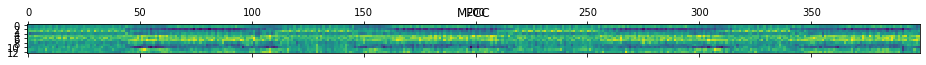

In [21]:
plt.matshow(mfccs.T)
plt.title('MFCC')

In [23]:
### Define a class to train the HMM ###

# Parameters of `hmm.GaussianHMM()`:
# `n_components`: number of states of HMM
# `covariance_type`: type of covariance matrix for each state. 
# Each state is a random vector. 
# This parameter is a string defining the type of covariance matrix of this vector. Defaults to `"diagonal"`

class HMM_Model(object):
    
    def __init__(self, num_components=8, num_iter=1000):
        
        self.n_components = num_components
        self.n_iter = num_iter
        # define the covariance type and the type of HMM:
        self.cov_type = 'diag'
        self.model_name = 'GaussianHMM'
        # initialize the variable in which we will store the models for each word:
        self.models = []
        # define the model using the specified parameters:
        self.model = hmm.GaussianHMM(n_components=self.n_components,
                                     covariance_type=self.cov_type,
                                     n_iter=self.n_iter)

    def train(self, training_data):
        
        """
        Defines a method to train the model
        'training_data' is a 2D numpy array where each row has the 
        length of number of mfcc coefficients
        """
        np.seterr(all='ignore')
        cur_model = self.model.fit(training_data)
        self.models.append(cur_model)

    
    def compute_score(self, input_data):
        
        """
        Define a method to compute log likelihood score for input features
        Returns: Log likelihood of sample input_data
        """
        return self.model.score(input_data)

In [22]:
def build_one_model(features_vector, num_states, num_cep_coeff):
    
    """
    features_vector: nparray of features from Class above
    num_states: number of hidden states in HMM
    num_cep_coeff: number of MFCC features extracted from each time window
    """
    
    # Initiate HMM model object
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore',category=DeprecationWarning)
        model = ModelHMM(num_components=num_states)

    # Train HMM model, calculate likelihood of the sample by the trained model
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore',category=DeprecationWarning)
        model.train(X)
        model_score = model.compute_score(X)
        
    return model, model_score, num_cep_coeff

Help on class GaussianHMM in module hmmlearn.hmm:

class GaussianHMM(hmmlearn.base._BaseHMM)
 |  GaussianHMM(n_components=1, covariance_type='diag', min_covar=0.001, startprob_prior=1.0, transmat_prior=1.0, means_prior=0, means_weight=0, covars_prior=0.01, covars_weight=1, algorithm='viterbi', random_state=None, n_iter=10, tol=0.01, verbose=False, params='stmc', init_params='stmc')
 |  
 |  Hidden Markov Model with Gaussian emissions.
 |  
 |  Parameters
 |  ----------
 |  n_components : int
 |      Number of states.
 |  
 |  covariance_type : string, optional
 |      String describing the type of covariance parameters to
 |      use.  Must be one of
 |  
 |      * "spherical" --- each state uses a single variance value that
 |        applies to all features.
 |      * "diag" --- each state uses a diagonal covariance matrix.
 |      * "full" --- each state uses a full (i.e. unrestricted)
 |        covariance matrix.
 |      * "tied" --- all states use **the same** full covariance matri

In [24]:
def hmm_aic(LLik,n,k):
    
    """
    Takes in loglikelihood of trained HMM plus number of params
    Returns: Model AIC
    """
    return -2*LLik+2*(n*n+k*n-1)